## imports and mount

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl

from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pd.set_option('precision', 3)

In [ ]:
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from google.colab import drive

drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


## Read file

In [ ]:
data = read_csv("gdrive/My Drive/PROJECT_ML/DATA/salary.csv", header=0, delimiter=',')
data.shape

(32561, 15)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Listing of attributes:

- **age**: continuous.
- **workclass**:  a general term to represent the employment status of an individual. 
  - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: this is the number of people that census believes the entry represents (continuous).
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: a number that describe your education status from preschool to doctorate (continuous).
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: represents what this individual is relative to other.
  - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **Salary (Target)**: >50K, <=50K.


In [ ]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.rename(columns = {'education-num':'education_num', 'marital-status':'marital_status', 'capital-gain':'capital_gain', 
                       'capital-loss':'capital_loss', 'hours-per-week':'hours_per_week', 'native-country':'native_country'}, inplace = True)

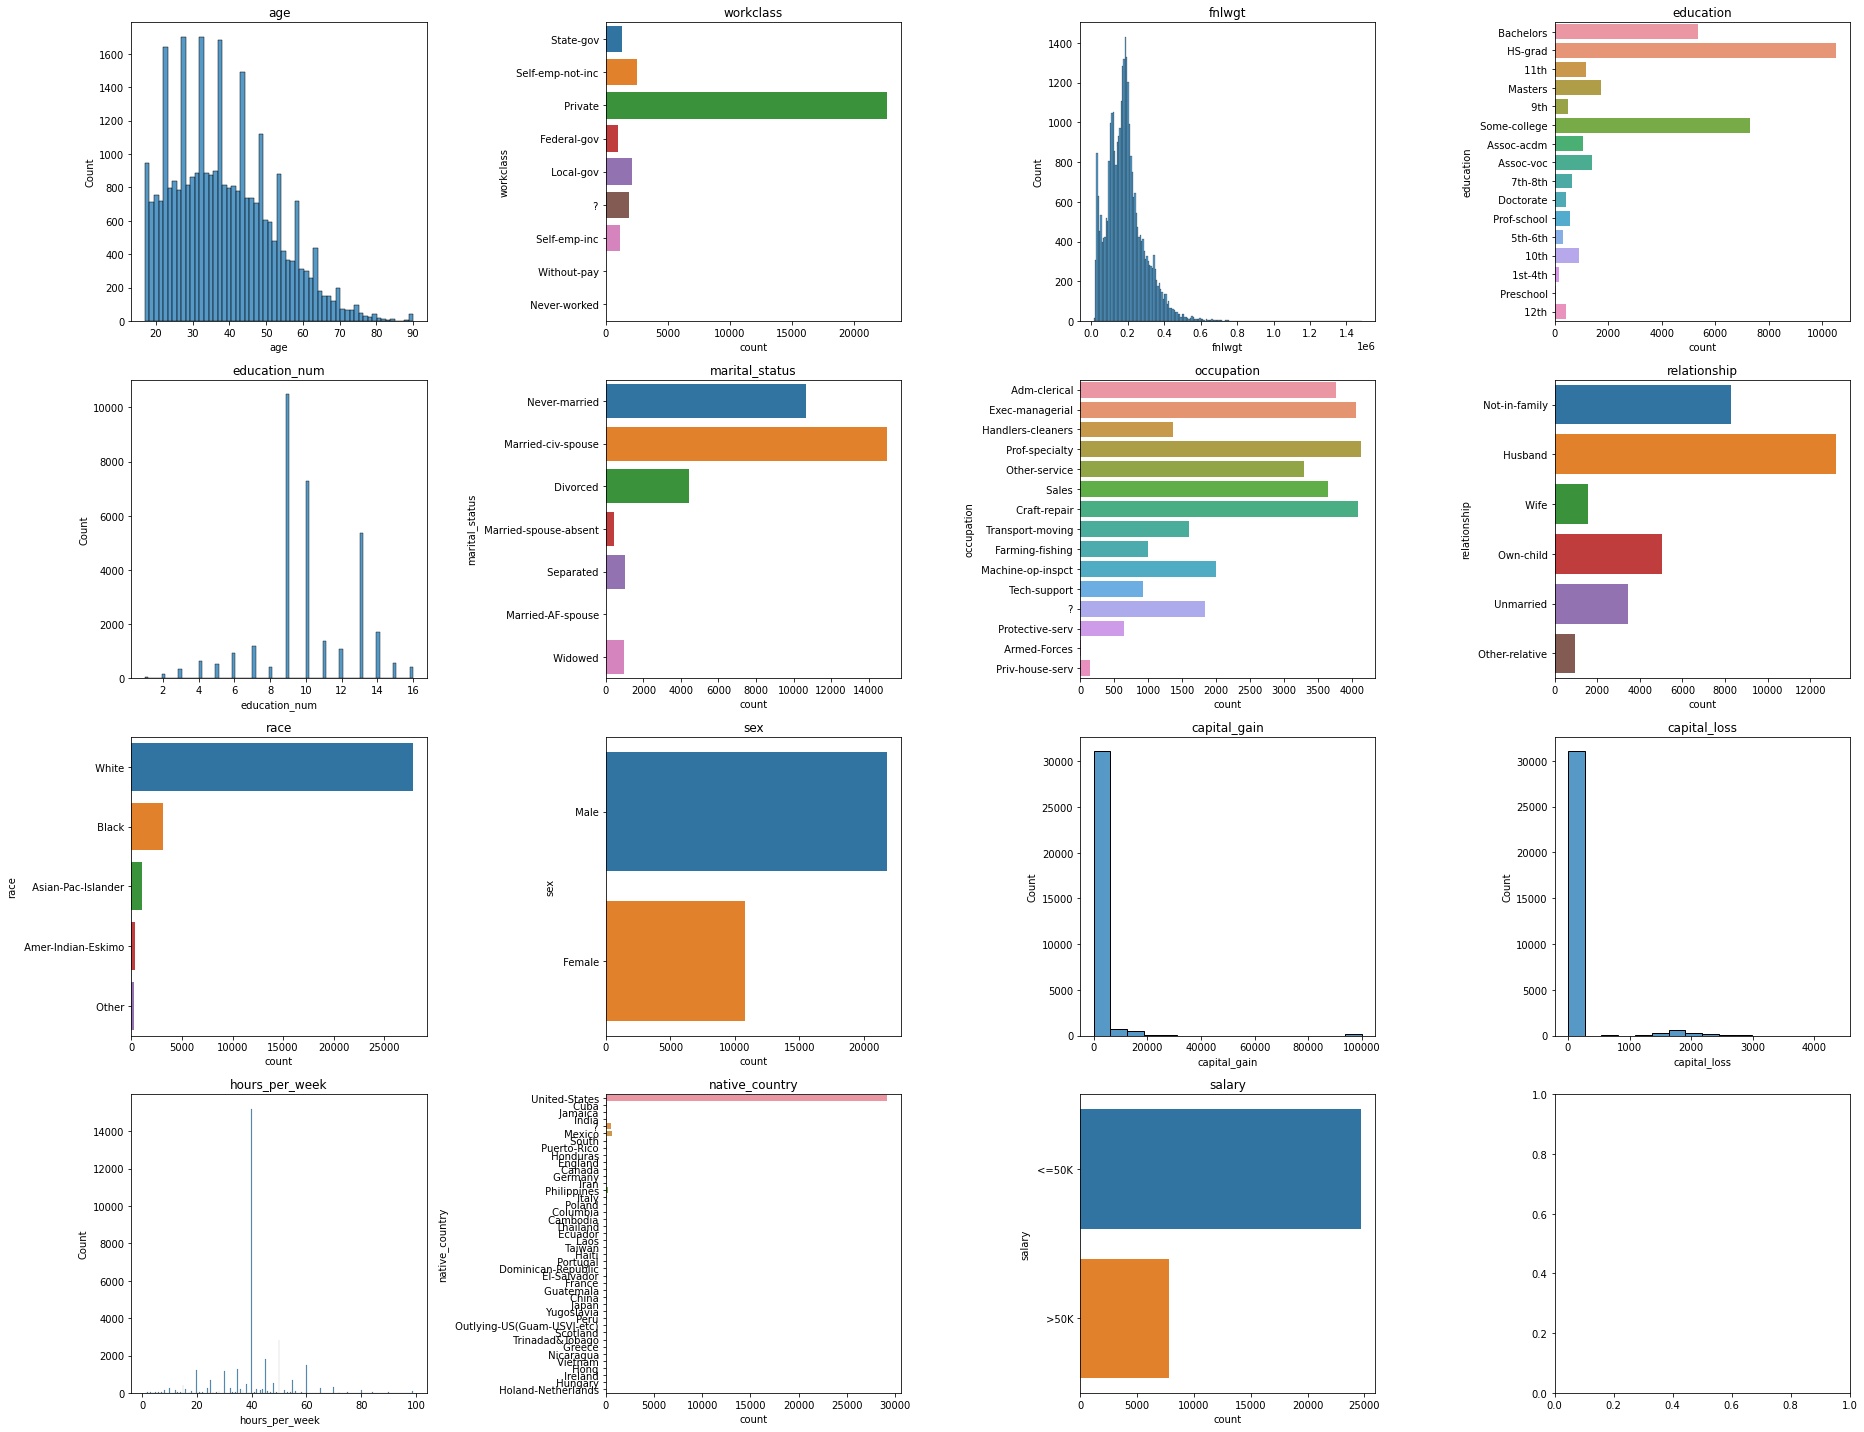

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(26,20))

# We will not plot country because it has too many categories.
for i, c in enumerate(data.columns):
    ax = axes.reshape(-1)[i]
    if data[c].dtype.kind == 'O':
        a = sns.countplot(y=c,data=data,ax=ax)
    else:
        b = sns.histplot(x=c,data=data,ax=ax)
        plt.tight_layout();
    t = ax.set_title(c)
plt.tight_layout()



In [ ]:
data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
data[data['occupation']==' ?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Our data is imbalance, as we can see almost 76% of the data have value "<=50K" and 24% of data have value ">50K"

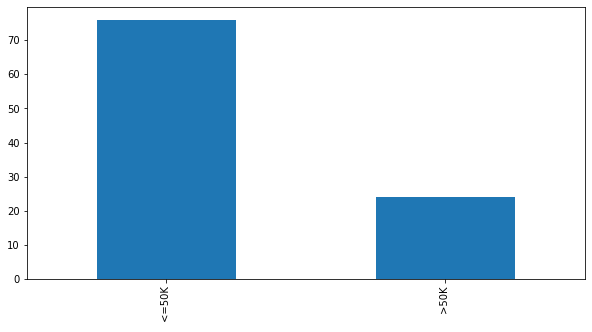

In [ ]:
fig = plt.figure(figsize=(10,5))
x= data["salary"]
perc = (pd.Series(x).value_counts(normalize=True, sort=False)*100).plot.bar()

## Duplicates

In [ ]:
data.duplicated().sum()

24

In [ ]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [ ]:
data.drop_duplicates(inplace=True)

## Treatment of missing values

In [ ]:
## 1.Check missing values and see if we have to remove them or treat them (Meri)

features = data.columns
for feature in features:
  num_out = sum(data[feature]==' ?')
  if num_out > 0:
    print('The feature', feature, 'has', num_out, 'missing values')
    print(round((num_out/len(data)) * 100,2), '%')
    print('')

The feature workclass has 1836 missing values
5.64 %

The feature occupation has 1843 missing values
5.66 %

The feature native_country has 582 missing values
1.79 %



In [ ]:
features = data.columns
for feature in features:
  num_out = sum(data[feature]==99999)
  if num_out > 0:
    print('The feature', feature, 'has', num_out, 'missing values')
    print(round((num_out/len(data)) * 100,2), '%')
    print('')

The feature capital_gain has 159 missing values
0.49 %



In [ ]:
data_no_outliers = data.copy()

In [ ]:
data_no_outliers = data_no_outliers[data_no_outliers.workclass!=' ?']
data_no_outliers = data_no_outliers[data_no_outliers.occupation!=' ?']
data_no_outliers = data_no_outliers[data_no_outliers.native_country!=' ?']
data_no_outliers = data_no_outliers[data_no_outliers.capital_gain!=99999]

print('We go from having', len(data),'samples to', len(data_no_outliers),'samples if we eliminate the missing values.')

We go from having 32537 samples to 29991 samples if we eliminate the missing values.


In [ ]:
(1-(29991/32537))*100

7.824937763161943

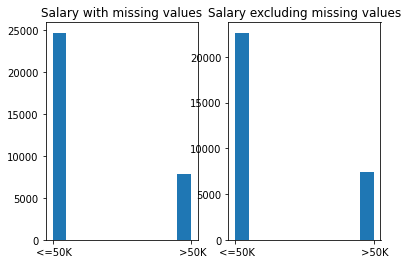

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(data.salary)
plt.title("Salary with missing values")
plt.subplot(1, 2, 2)
plt.hist(data_no_outliers.salary)
plt.title("Salary excluding missing values")
plt.show();

With the histograms we have above we can see that they both look identical, (one with the missing values included and the other one removing the missings). So we are going to remove them in the next step.

In [ ]:
data = data_no_outliers.copy()

## Finding Outliers

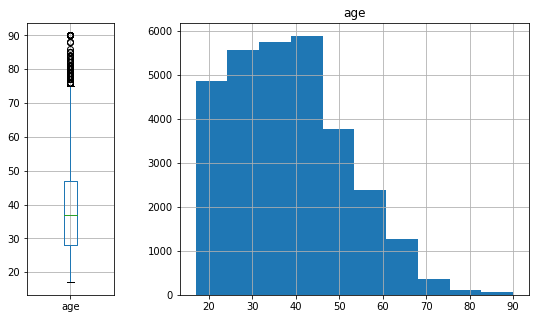

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
data.boxplot(column='age',ax=axes[0]);
data.hist(column='age', ax=axes[1]);

In [ ]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

big_outliers = data['age'] > (Q3 + 1.5 * IQR)

print('There are: {0} outliers'.format(sum(big_outliers)))


There are: 167 outliers


In [ ]:
data.age.describe()

count    29991.000000
mean        38.403554
std         13.131274
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
data[big_outliers].age.describe()

count    167.000000
mean      81.449102
std        5.076118
min       76.000000
25%       77.000000
50%       80.000000
75%       84.000000
max       90.000000
Name: age, dtype: float64

In [ ]:
age_outliers = data[big_outliers]

In [ ]:
age_outliers[['age', 'hours_per_week']].describe()

,age,hours_per_week
count,167.000000,167.000000
mean,81.449102,28.886228
std,5.076118,15.741672
min,76.000000,1.000000
25%,77.000000,16.000000
50%,80.000000,30.000000
75%,84.000000,40.000000
max,90.000000,99.000000


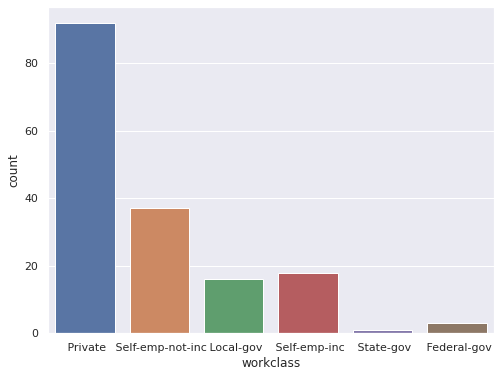

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'workclass', data = age_outliers)

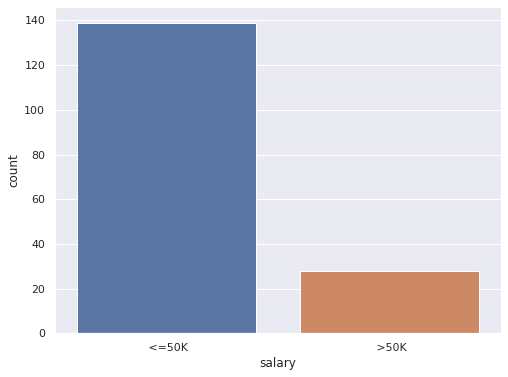

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'salary', data = age_outliers)

In [ ]:
age_outliers.salary.value_counts()

 <=50K    139
 >50K      28
Name: salary, dtype: int64

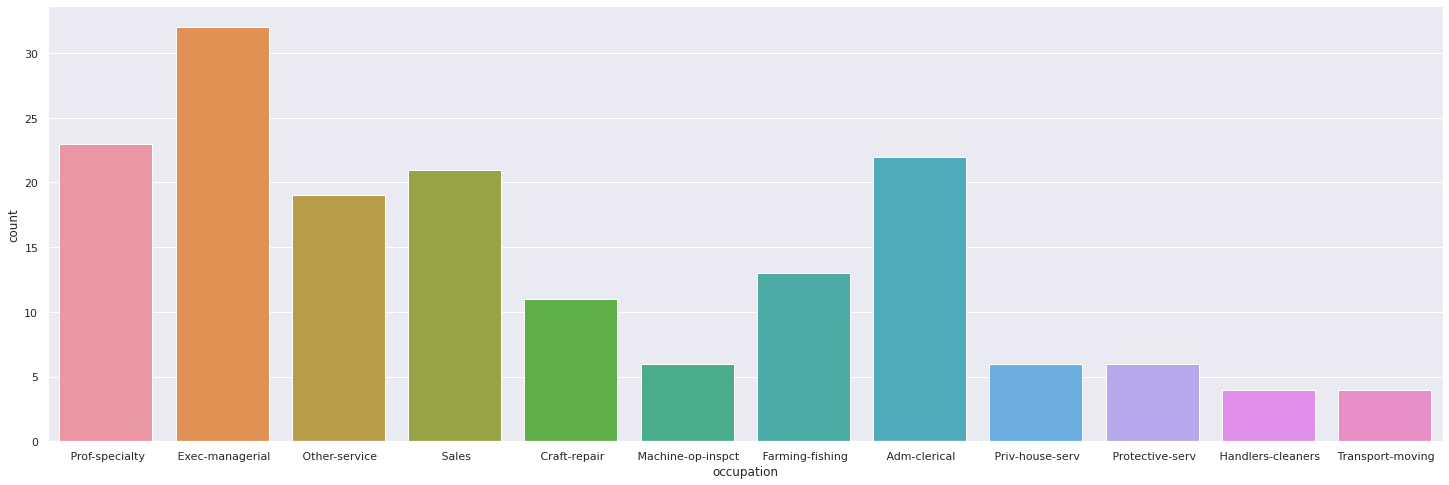

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
sns.countplot(x = 'occupation', data = age_outliers)

In [ ]:
pd.crosstab(age_outliers['salary'], age_outliers['occupation'])

occupation,Adm-clerical,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Transport-moving
salary,,,,,,,,,,,,
<=50K,20,9,21,11,4,6,19,6,19,6,14,4
>50K,2,2,11,2,0,0,0,0,4,0,7,0


### capital gain

Most of the data have this variable = 0, therefore we will only see the outliers in individuals that have capital_gain > 0

In [ ]:
test = data[data['capital_gain']!=0]

In [ ]:
len(data)

29991

In [ ]:
len(test)

2390

In [ ]:
2390/29991*100

7.969057383881831

[Text(0.5, 1.0, 'Correlación entre target y capital_gain diferente a 0')]

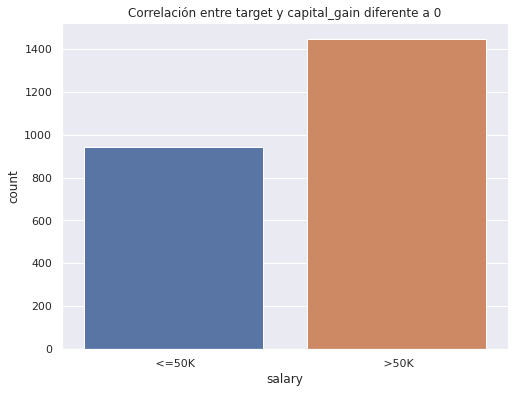

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'salary', data = test).set(title='Correlación entre target y capital_gain diferente a 0')

Vemos que tiene un efecto nuestra target con la variable capital_gain cuando esta no es 0 tal y como vemos en el gráfico anterior. En cambio, cuando esta es 0 el target mayoritariamente tiene valor de '<=50K'

[Text(0.5, 1.0, 'Correlación entre target y capital_gain = 0')]

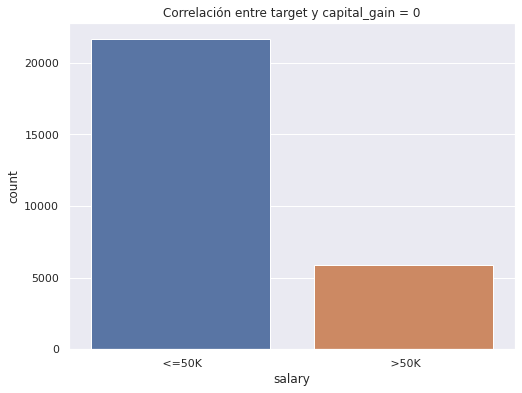

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'salary', data = data[data['capital_gain']==0]).set(title='Correlación entre target y capital_gain = 0')

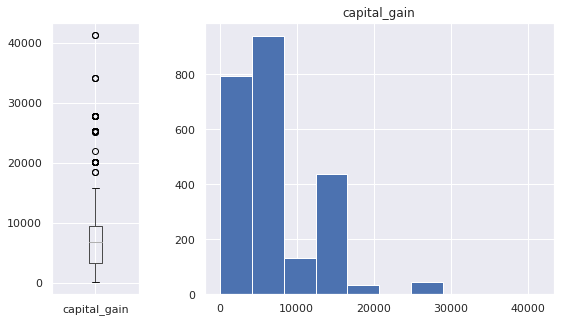

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
test.boxplot(column='capital_gain',ax=axes[0]);
test.hist(column='capital_gain', ax=axes[1]);

In [ ]:
Q1 = test['capital_gain'].quantile(0.25)
Q3 = test['capital_gain'].quantile(0.75)
IQR = Q3 - Q1

big_outliers = test['capital_gain'] > (Q3 + 1.5 * IQR)

print('There are: {0} outliers'.format(sum(big_outliers)))
test[big_outliers]

There are: 86 outliers


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
534,67,Private,231559,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,48,United-States,>50K
704,46,Private,295566,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Female,25236,0,65,United-States,>50K
1378,65,Private,198766,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,20051,0,40,United-States,>50K
1764,46,Private,133938,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,27828,0,50,United-States,>50K
2031,63,Self-emp-not-inc,167501,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,20051,0,10,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29892,51,Private,673764,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,27828,0,40,United-States,>50K
30788,67,Self-emp-not-inc,191380,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,25,United-States,>50K
30815,54,Self-emp-not-inc,28186,Bachelors,13,Divorced,Farming-fishing,Not-in-family,White,Male,27828,0,50,United-States,>50K
32198,67,Self-emp-inc,182581,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,20,United-States,>50K


In [ ]:
test[big_outliers].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,86.000000,86.000000,86.000000,86.000000,86.0,86.000000
mean,55.290698,168264.930233,12.616279,24696.860465,0.0,43.813953
std,16.485906,100922.027470,2.670839,4766.136280,0.0,14.183264
min,18.000000,28186.000000,1.000000,18481.000000,0.0,2.000000
25%,43.500000,109974.000000,10.000000,20051.000000,0.0,40.000000
50%,58.500000,158558.000000,13.000000,25236.000000,0.0,45.000000
75%,67.000000,199653.250000,14.750000,27828.000000,0.0,50.000000
max,90.000000,673764.000000,16.000000,41310.000000,0.0,72.000000


The same happens with the variable capital_loss, most of the data have this variable = 0, therefore we will only see the outliers in individuals that have capital_gain > 0

In [ ]:
def capital_gain(x):
  if x['capital_gain']!=0:
    return 1
  else:
    return 0

data['capital_gain'] = data.apply(lambda row : capital_gain(row), axis = 1)

In [ ]:
list(data.capital_gain.unique())

[1, 0]

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### capital loss

In [ ]:
test = data[data['capital_loss']!=0]

In [ ]:
len(test)

1427

In [ ]:
len(test)/len(data)*100

4.758094094895135

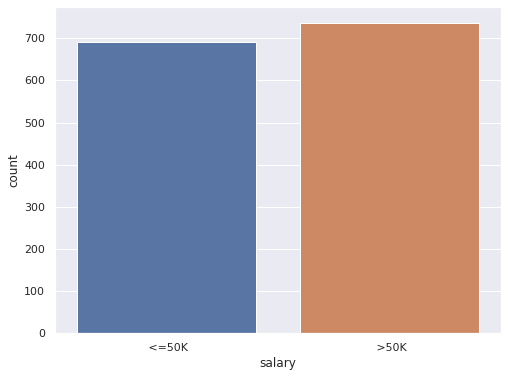

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'salary', data = test)

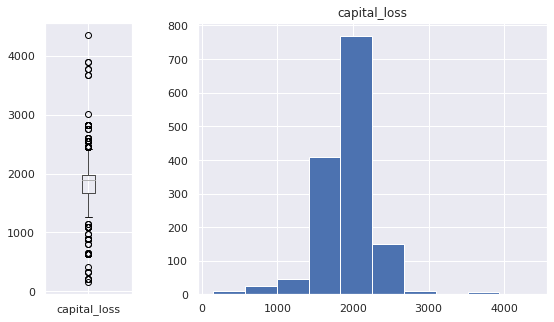

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
test.boxplot(column='capital_loss',ax=axes[0]);
test.hist(column='capital_loss', ax=axes[1]);

In [ ]:
Q1 = test['capital_loss'].quantile(0.25)
Q3 = test['capital_loss'].quantile(0.75)
IQR = Q3 - Q1

big_outliers = test['capital_loss'] > (Q3 + 1.5 * IQR)
#small_outliers = test['capital_loss'] < (Q1 - 1.5 * IQR)

print('There are: {0} outliers'.format(sum(big_outliers)))
test[big_outliers]

There are: 53 outliers


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
2414,44,Private,326232,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,2547,50,United-States,>50K
2859,40,Self-emp-not-inc,335549,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2444,45,United-States,>50K
5713,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
5979,37,Self-emp-inc,107164,10th,6,Never-married,Transport-moving,Not-in-family,White,Male,0,2559,50,United-States,>50K
6475,38,Private,175360,10th,6,Never-married,Prof-specialty,Not-in-family,White,Male,0,2559,90,United-States,>50K
6581,23,Private,44064,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,2559,40,United-States,>50K
7047,59,Self-emp-inc,107287,10th,6,Widowed,Exec-managerial,Unmarried,White,Female,0,2559,50,United-States,>50K
7789,52,Private,198863,Prof-school,15,Divorced,Exec-managerial,Not-in-family,White,Male,0,2559,60,United-States,>50K
8321,51,Private,153870,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2603,40,United-States,<=50K
10063,50,Private,237729,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,2444,72,United-States,>50K


In [ ]:
test[big_outliers].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,53.000000,53.000000,53.000000,53.0,53.000000,53.000000
mean,46.849057,166375.641509,10.886792,0.0,2758.452830,45.773585
std,12.787308,82875.630311,3.539124,0.0,464.229741,13.260180
min,21.000000,29059.000000,2.000000,0.0,2444.000000,18.000000
25%,38.000000,115806.000000,9.000000,0.0,2467.000000,40.000000
50%,45.000000,150601.000000,11.000000,0.0,2559.000000,42.000000
75%,53.000000,205246.000000,14.000000,0.0,2824.000000,50.000000
max,82.000000,422013.000000,16.000000,0.0,4356.000000,90.000000


In [ ]:
data = data.drop(['capital_loss'], axis=1)

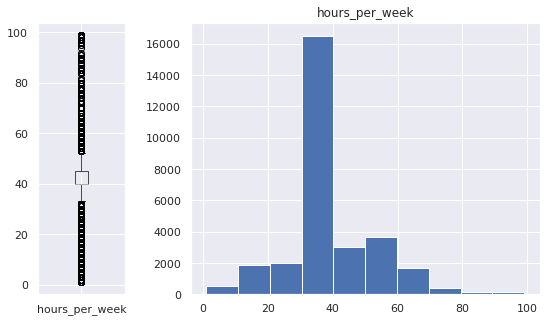

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
data.boxplot(column='hours_per_week',ax=axes[0]);
data.hist(column='hours_per_week', ax=axes[1]);

In [ ]:
data.hours_per_week.describe()

count    29991.000000
mean        40.888700
std         11.958376
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [ ]:
Q1 = data['hours_per_week'].quantile(0.25)
Q3 = data['hours_per_week'].quantile(0.75)
IQR = Q3 - Q1

big_outliers = data['hours_per_week'] > (Q3 + 1.5 * IQR)

print('There are: {0} outliers'.format(sum(big_outliers))) 
data[big_outliers].hours_per_week.describe()

There are: 3270 outliers


count    3270.000000
mean       63.265749
std         9.731609
min        53.000000
25%        57.000000
50%        60.000000
75%        65.000000
max        99.000000
Name: hours_per_week, dtype: float64

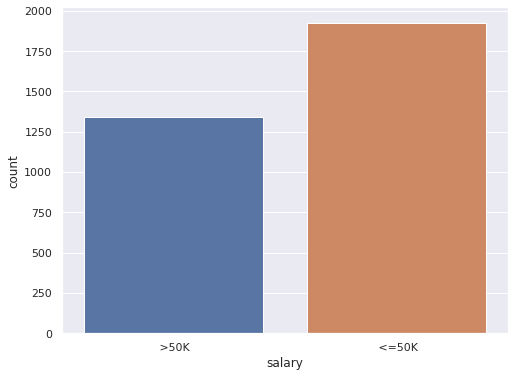

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'salary', data = data[big_outliers])

In [ ]:
data[big_outliers].salary.value_counts()

 <=50K    1926
 >50K     1344
Name: salary, dtype: int64

In [ ]:
print('Less than 50k {0}'.format(1926/3270*100))
print('More than 50k {0}'.format(1344/3270*100))

Less than 50k 58.89908256880734
More than 50k 41.10091743119266


In [ ]:
import plotly.express as px

fig = px.scatter(data, x="hours_per_week", y="age", color="salary")
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fcc0c5950>],
      dtype=object)

Text(0.5, 1.0, 'salary: <=50K')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fcc011f50>],
      dtype=object)

Text(0.5, 1.0, 'salary >50K')

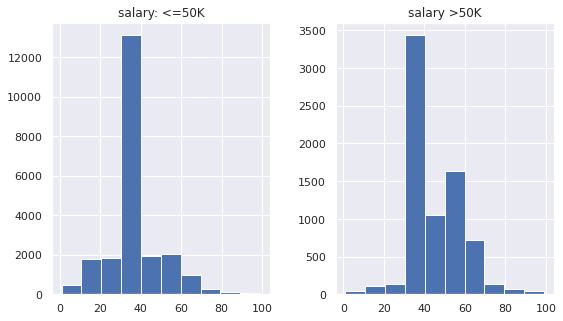

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [3, 3]}, figsize=(9,5))
data[data.salary == data.salary.unique()[0]].hist(column='hours_per_week',ax=axes[0]); # <=50K
axes[0].set_title('salary: <=50K')
data[data.salary == data.salary.unique()[1]].hist(column='hours_per_week', ax=axes[1]); #>50K
axes[1].set_title('salary >50K')

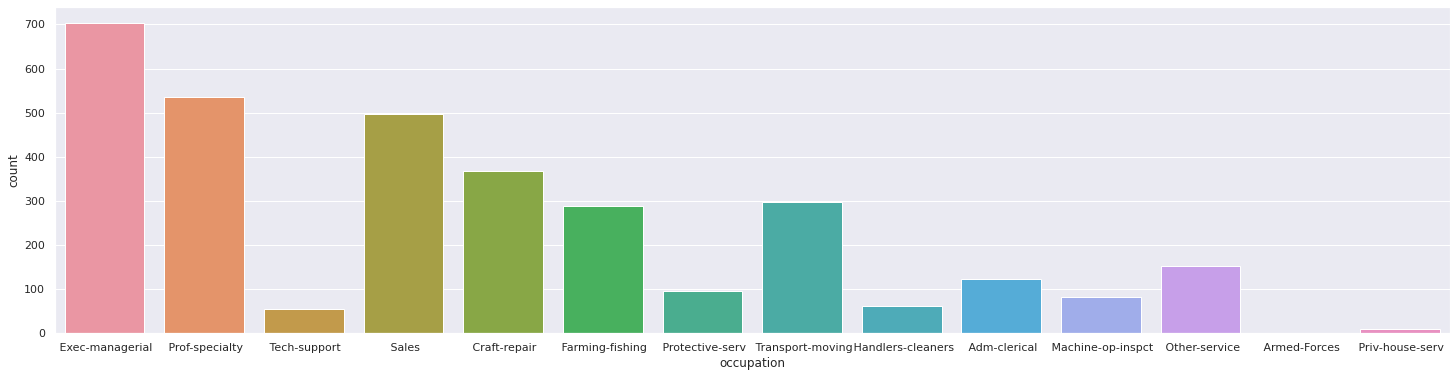

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})
sns.countplot(x = 'occupation', data = data[big_outliers])

## Treatment of mixed data types

In [ ]:
data.salary.replace(list(data.salary.unique()), 
                   [0, 1], 
                   inplace=True); # 0: <=50K AND 1: >50K

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,0


## Derivation of new variables



In [ ]:
def country(x):
    if x['native_country']=='United-States':
        return 'United-States'
    else:
        return 'NOT_United-States'

data['native_country']=data.apply(lambda x : country(x), axis = 1)

In [ ]:
## add the variable hours range

min_hours_per_week = data.hours_per_week.min()
max_hours_per_week = data.hours_per_week.max()
print('The minimum number of hours per week is', min_hours_per_week, 'and the maximum is', max_hours_per_week)

The minimum number of hours per week is 1 and the maximum is 99


In [ ]:
data['hours_per_week_interval'] = pd.cut(data.hours_per_week, bins=[0,30,50,100])
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,salary,hours_per_week_interval
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,40,NOT_United-States,0,"(30, 50]"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,NOT_United-States,0,"(0, 30]"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,NOT_United-States,0,"(30, 50]"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,NOT_United-States,0,"(30, 50]"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,NOT_United-States,0,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,NOT_United-States,0,"(30, 50]"
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,NOT_United-States,1,"(30, 50]"
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,NOT_United-States,0,"(30, 50]"
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,NOT_United-States,0,"(0, 30]"


In [ ]:
def hours_per_week_interval_convert(x):
  if x['hours_per_week_interval'] == data.hours_per_week_interval.unique()[1]:
    return 'part_time'
  if x['hours_per_week_interval'] == data.hours_per_week_interval.unique()[0]:
    return 'full_time'
  else:
    return 'extra_full_time'

data['hours_per_week_interval'] = data.apply(lambda row : hours_per_week_interval_convert(row), axis = 1)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,salary,hours_per_week_interval
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,40,NOT_United-States,0,full_time
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,NOT_United-States,0,part_time
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,NOT_United-States,0,full_time
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,NOT_United-States,0,full_time
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,NOT_United-States,0,full_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,NOT_United-States,0,full_time
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,NOT_United-States,1,full_time
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,NOT_United-States,0,full_time
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,NOT_United-States,0,part_time


## LOAD DATA

In [ ]:
## Save CSV
data.to_csv('gdrive/My Drive/PROJECT_ML/DATA/data_salary_preprocessed.csv', encoding='utf-8')